# Using Data Analysis Techniques and Machine Learning to Search for Dark Matter (IN PROGRESS)

## Introduction, etc. here

In [1]:
import pandas as pd #So we can store data in DataFrames (an object type that makes for easier analysis)
import numpy as np #used for calculations
import uproot3 #allows us to accesss the data within the files we are using
import matplotlib.pyplot as plt #used for plotting graphs
                

from matplotlib.lines import Line2D #To put a dashed line in the legend (needed for this notebook?)
from matplotlib.ticker import AutoMinorLocator,MaxNLocator # for minor ticks and forcing integer tick labels (needed?)

In [2]:
data_path = 'C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_306109.dmV_Zll_MET40_DM1_MM800.exactly2lep.root'
#notice this is in the .root format used for CERN data, so we need the uproot3 module to access it

Data from: https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/exactly2lep/MC/

In [4]:
file_open = uproot3.open(data_path)["mini"] #open data file (whats mini?)

In [5]:
uproot3.numentries(data_path, "mini") #check the number of rows of data

5206

In [6]:
keys = file_open.keys()
show = file_open.show()
#these two are similar and show the labels of all the columns of data

runNumber                  (no streamer)              asdtype('>i4')
eventNumber                (no streamer)              asdtype('>i4')
channelNumber              (no streamer)              asdtype('>i4')
mcWeight                   (no streamer)              asdtype('>f4')
scaleFactor_PILEUP         (no streamer)              asdtype('>f4')
scaleFactor_ELE            (no streamer)              asdtype('>f4')
scaleFactor_MUON           (no streamer)              asdtype('>f4')
scaleFactor_PHOTON         (no streamer)              asdtype('>f4')
scaleFactor_TAU            (no streamer)              asdtype('>f4')
scaleFactor_BTAG           (no streamer)              asdtype('>f4')
scaleFactor_LepTRIGGER     (no streamer)              asdtype('>f4')
scaleFactor_PhotonTRIGGER  (no streamer)              asdtype('>f4')
trigE                      (no streamer)              asdtype('bool')
trigM                      (no streamer)              asdtype('bool')
trigP                      (no s

In [7]:
len(file_open.array(keys[69])) #the number of entries/rows in one of the arrays in the data

5206

In [8]:
keys[68] #gives the name of one of the arrays/columns in the data

b'XSection'

In [9]:
file_open.array(keys[68]) #viewing the data in one of the arrays/columns in the dataset

array([0.005016, 0.005016, 0.005016, ..., 0.005016, 0.005016, 0.005016],
      dtype=float32)

In [10]:
data_dict = {} #dictionary to hold all the data that we will be looking at


relevant_data = ['runNumber','eventNumber','channelNumber','mcWeight','lep_n','lep_truthMatched','lep_trigMatched',
                'lep_pt','lep_eta','lep_phi','lep_E','lep_z0','lep_charge','lep_type','lep_isTightID','lep_ptcone30',
                 'lep_etcone20','lep_trackd0pvunbiased','lep_tracksigd0pvunbiased','met_et','lep_pt_syst','XSection',
                 'SumWeights']
# these are the headings of the columns of data that we will be looking at
relevant_data_locations = [0,1,2,3,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,63,68,69]


#the below lines read the data that we are going to use into the dictionary above
counter = 0
for i in relevant_data_locations:
    data_dict[relevant_data[counter]] = file_open.array(keys[i]) 
    #creates a new key in the dictionary using the entries in relevant_data, and adds the corresponding data values by opening
    #the right array of data (using the column number given in relevant_data_locations)
    counter+=1
    

#data_dict
#uncomment above to view the dictionary

In [11]:
raw_data_df = pd.DataFrame(data_dict) #makes a DataFrame from the constructed dictionary
raw_data_df #view the dataframe

,runNumber,eventNumber,channelNumber,mcWeight,lep_n,lep_truthMatched,lep_trigMatched,lep_pt,lep_eta,lep_phi,...,lep_type,lep_isTightID,lep_ptcone30,lep_etcone20,lep_trackd0pvunbiased,lep_tracksigd0pvunbiased,met_et,lep_pt_syst,XSection,SumWeights
0,284500,46,306109,1.0,2,"[True, False]","[True, False]","[100990.07, 7426.121]","[-0.7682709, 0.72368354]","[-1.0182151, -2.1507058]",...,"[11, 11]","[True, True]","[0.0, 0.0]","[1215.9817, -544.9584]","[-0.0099716205, 0.009749278]","[1.1405811, 0.6889102]",348277.750000,"[668.81635, 66.78632]",0.005016,10000.0
1,284500,205,306109,1.0,2,"[True, True]","[True, True]","[93777.734, 31697.932]","[-0.5999321, -0.89178747]","[0.17214498, -1.7731516]",...,"[13, 13]","[True, True]","[0.0, 0.0]","[1523.3855, 1132.3503]","[-0.0024083678, -0.0005763579]","[0.32693756, 0.06280022]",104342.265625,"[2037.9049, 107.43644]",0.005016,10000.0
2,284500,235,306109,1.0,2,"[True, True]","[True, True]","[84696.75, 68743.09]","[1.1828485, 1.098033]","[0.37650913, -0.83802056]",...,"[11, 11]","[True, True]","[0.0, 0.0]","[3794.2654, -442.27618]","[0.008800238, 0.0039059948]","[1.0115662, 0.46925277]",128276.781250,"[428.07352, 308.5227]",0.005016,10000.0
3,284500,482,306109,1.0,2,"[True, True]","[True, False]","[95645.26, 22749.984]","[0.03707598, -0.2220163]","[-0.08936702, 2.6688776]",...,"[11, 11]","[True, True]","[0.0, 0.0]","[1735.391, -518.5956]","[-0.013859223, 0.019677153]","[1.790706, 1.7911686]",63393.468750,"[1129.4507, 80.28829]",0.005016,10000.0
4,284500,630,306109,1.0,2,"[True, True]","[True, False]","[128806.86, 15045.653]","[-0.34280708, -0.80403394]","[-2.7522888, -0.12069551]",...,"[11, 11]","[True, True]","[0.0, 0.0]","[-272.75995, -339.5269]","[-0.020453207, 0.01955478]","[3.6392374, 1.2386608]",123417.039062,"[497.85922, 170.0829]",0.005016,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5201,284500,9440,306109,1.0,2,"[True, True]","[True, True]","[72181.87, 51158.71]","[0.5563412, -0.18103471]","[3.0907967, 1.6497777]",...,"[13, 13]","[True, True]","[0.0, 0.0]","[-761.564, -761.564]","[0.011878228, -0.0021623962]","[1.959224, 0.33713147]",106641.679688,"[706.1843, 566.79584]",0.005016,10000.0
5202,284500,9558,306109,1.0,2,"[True, True]","[True, False]","[306378.8, 21968.338]","[0.6307145, 0.52217853]","[-2.6945016, -1.5103921]",...,"[13, 13]","[True, True]","[0.0, 0.0]","[814.3611, -943.9758]","[-0.006906736, 0.007331518]","[1.3408303, 0.7073485]",347592.312500,"[37542.293, 155.38966]",0.005016,10000.0
5203,284500,9697,306109,1.0,2,"[True, True]","[True, True]","[70584.914, 54114.15]","[-1.3256004, -1.0071476]","[-1.9375601, 3.0470493]",...,"[13, 13]","[True, True]","[0.0, 0.0]","[-389.3839, -726.9248]","[0.011187258, -0.024736652]","[1.4650736, 2.6470094]",110196.546875,"[683.6778, 116.885124]",0.005016,10000.0
5204,284500,9922,306109,1.0,2,"[True, True]","[True, True]","[102851.836, 31841.15]","[1.6040598, 1.010763]","[0.39593637, 2.0243583]",...,"[11, 11]","[True, True]","[1450.1215, 0.0]","[1760.7639, -980.12756]","[0.014684265, 0.0007587629]","[1.0974138, 0.045595814]",97570.312500,"[1874.4982, 65.11265]",0.005016,10000.0


In [12]:
raw_data_df['lep_charge'] #view one column of the dataframe

0       [-1, 1]
1       [1, -1]
2       [1, -1]
3       [1, -1]
4       [-1, 1]
         ...   
5201    [-1, 1]
5202    [1, -1]
5203    [1, -1]
5204    [-1, 1]
5205    [1, -1]
Name: lep_charge, Length: 5206, dtype: object

In [13]:
len(relevant_data)

23

In the dataframe we see many columns that appear to only one unique value, these will not need to be histogrammed.

~First we will check the number of unique values in each column of the Dataframe~

*For now all columns of data will be histogrammed*

In [56]:
#BELOW IS OBSOLETE



#array_comparison=[] #list to info about columns to check wheteher they should be histogrammed

#below is too computationally expensive, how to make process more lightweight?
#below is supposed to check data columns with arrays to see if entries are identical to the first

#for i in raw_data_df:
#    
#    array_similarity =[] #list to see similarity of columns of data that contain lists
#    if type(raw_data_df[i][0])==np.ndarray: #if data column contains lists(numpy arrays)
#        for j in range(len(raw_data_df[i])):
#            if (raw_data_df[i][0]==raw_data_df[i][j]).all(): #check to see how many entries in the column are
#                                                                              #identical to the first (better way?)
#                array_similarity.append('same as first entry')
#            array_comparison.append((i,'arrays','no. of entries identical to 1st= '+str(len(array_similarity))))

#for i in raw_data_df:
#    testlist = (np.trunc(np.linspace(0,5206,100))).astype(int)#array with evenly spaced entries
#    if type(raw_data_df[i][0])==np.ndarray: #if data column contains lists(numpy arrays)
#        for j in testlist:
#            if (raw_data_df[i][0]==raw_data_df[i][j]).all():
#                array_similarity.append('same as first entry')
#            array_comparison.append((i,'arrays','no. of entries identical to 1st= '+str(len(array_similarity))))


#for i in raw_data_df:                                    
#    if type(raw_data_df[i][0])!=np.ndarray:
#        array_comparison.append((i,'individual values','no. of unique values = '+str(len(set(raw_data_df[i])))))
                

#print(array_comparison)    

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [14]:
for i in raw_data_df:
    print(i)

runNumber
eventNumber
channelNumber
mcWeight
lep_n
lep_truthMatched
lep_trigMatched
lep_pt
lep_eta
lep_phi
lep_E
lep_z0
lep_charge
lep_type
lep_isTightID
lep_ptcone30
lep_etcone20
lep_trackd0pvunbiased
lep_tracksigd0pvunbiased
met_et
lep_pt_syst
XSection
SumWeights


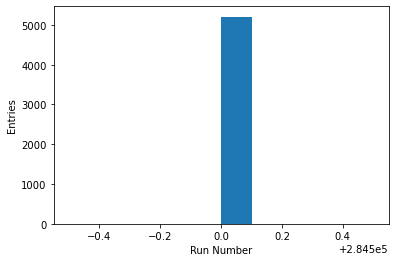

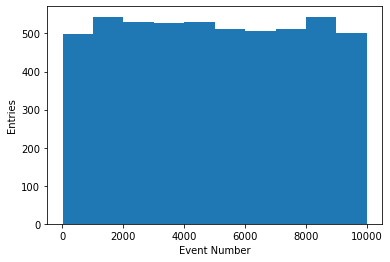

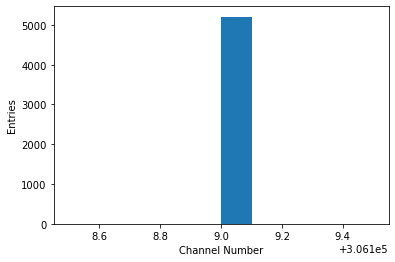

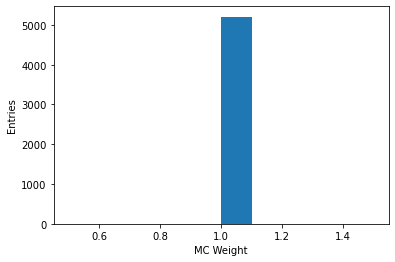

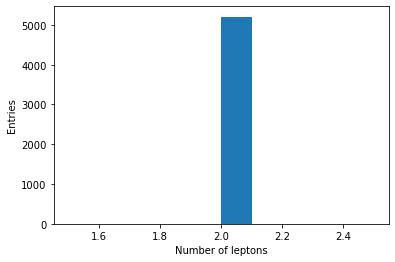

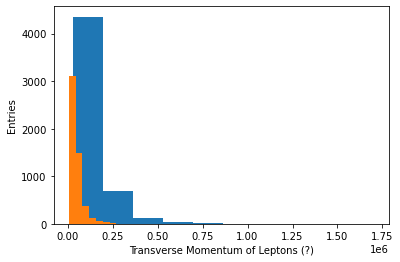

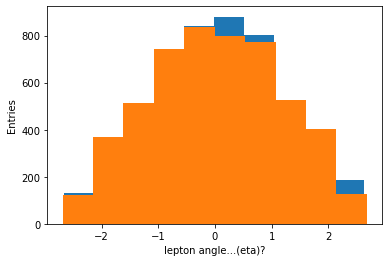

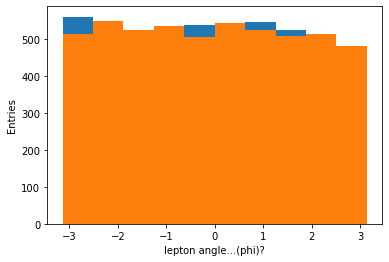

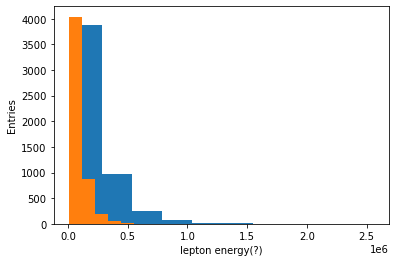

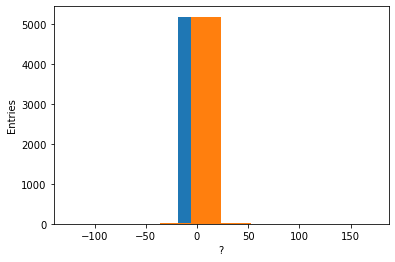

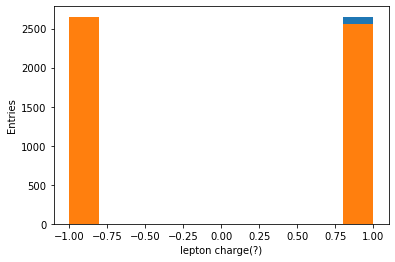

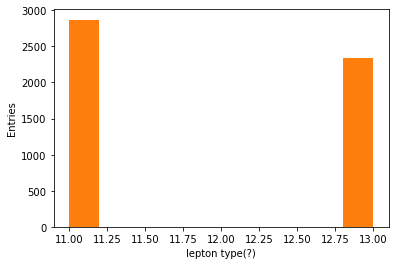

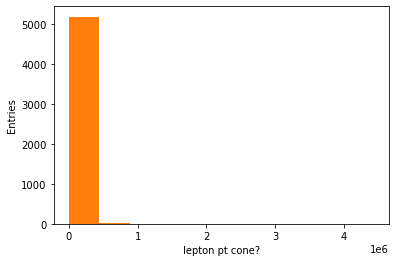

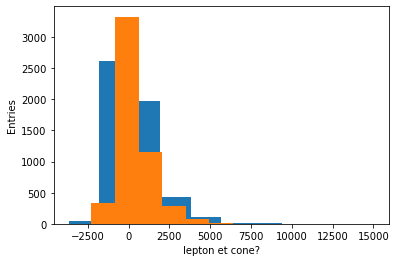

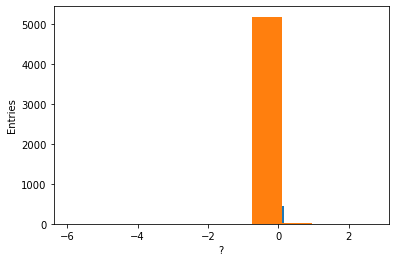

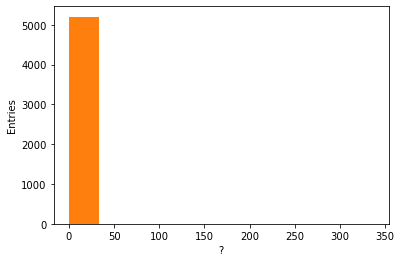

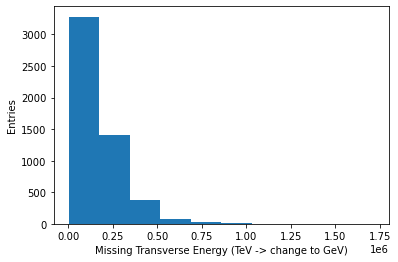

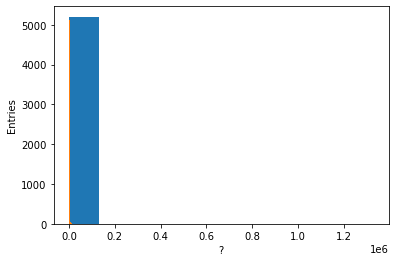

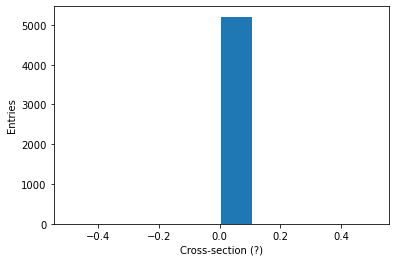

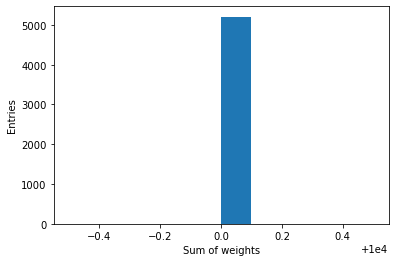

In [18]:
runNum_hist = plt.hist(raw_data_df['runNumber'])
plt.xlabel('Run Number')
plt.ylabel('Entries')
plt.show()


eventNum_hist = plt.hist(raw_data_df['eventNumber'])
plt.xlabel('Event Number')
plt.ylabel('Entries')
plt.show()


chanNum_hist = plt.hist(raw_data_df['channelNumber'])
plt.xlabel('Channel Number')
plt.ylabel('Entries')
plt.show()


mcW_hist = plt.hist(raw_data_df['mcWeight'])
plt.xlabel('MC Weight')
plt.ylabel('Entries')
plt.show()


lepN_hist = plt.hist(raw_data_df['lep_n'])
plt.xlabel('Number of leptons')
plt.ylabel('Entries')
plt.show()


#lep1TM = []
#lep2TM = []
#for i in raw_data_df['lep_truthMatched']:
#    lep1TM.append(i[0])
#    lep2TM.append(i[1])
#lep1TM_hist = plt.hist(lep1TM)#PC doesn't like the bools
#lep2TM_hist = plt.hist(lep2TM)
#plt.xlabel('?')
#plt.ylabel('Entries')
#plt.show()


#lepTrM_hist = plt.hist(raw_data_df['lep_trigMatched'])#PC doesn't like the bools
#plt.xlabel('?')
#plt.ylabel('Entries')
#plt.show()


lep1PT = []
lep2PT = []
for i in raw_data_df['lep_pt']:
    lep1PT.append(i[0])
    lep2PT.append(i[1])
lep1PT_hist = plt.hist(lep1PT)
lep2PT_hist = plt.hist(lep2PT)
plt.xlabel('Transverse Momentum of Leptons (?)')
plt.ylabel('Entries')
plt.show()
#lepPT_hist = plt.hist(raw_data_df['lep_pt'])#arrays
#plt.xlabel('Transverse Momentum of Leptons (?)')
#plt.ylabel('Entries')
#plt.show()


lep1ETA = []
lep2ETA = []
for i in raw_data_df['lep_eta']:
    lep1ETA.append(i[0])
    lep2ETA.append(i[1])
lep1ETA_hist = plt.hist(lep1ETA)
lep2ETA_hist = plt.hist(lep2ETA)
plt.xlabel('lepton angle...(eta)?')
plt.ylabel('Entries')
plt.show()
#lepETA_hist = plt.hist(raw_data_df['lep_eta'])#arrays
#plt.xlabel('lepton angle...(eta)?')
#plt.ylabel('Entries')
#plt.show()


lep1PHI = []
lep2PHI = []
for i in raw_data_df['lep_phi']:
    lep1PHI.append(i[0])
    lep2PHI.append(i[1])
lep1PHI_hist = plt.hist(lep1PHI)
lep2PHI_hist = plt.hist(lep2PHI)
plt.xlabel('lepton angle...(phi)?')
plt.ylabel('Entries')
plt.show()
#lepPHI_hist = plt.hist(raw_data_df['lep_phi'])#arrays
#plt.xlabel('lepton angle...(phi)?')
#plt.ylabel('Entries')
#plt.show()


lep1E = []
lep2E = []
for i in raw_data_df['lep_E']:
    lep1E.append(i[0])
    lep2E.append(i[1])
lep1E_hist = plt.hist(lep1E)
lep2E_hist = plt.hist(lep2E)
plt.xlabel('lepton energy(?)')
plt.ylabel('Entries')
plt.show()
#lepE_hist = plt.hist(raw_data_df['lep_E'])#arrays
#plt.xlabel('lepton energy(?)')
#plt.ylabel('Entries')
#plt.show()


lep1Z0 = []
lep2Z0 = []
for i in raw_data_df['lep_z0']:
    lep1Z0.append(i[0])
    lep2Z0.append(i[1])
lep1Z0_hist = plt.hist(lep1Z0)
lep2Z0_hist = plt.hist(lep2Z0)
plt.xlabel('?')#mm
plt.ylabel('Entries')
plt.show()
#lepZ0_hist = plt.hist(raw_data_df['lep_z0'])#arrays
#plt.xlabel('?')
#plt.ylabel('Entries')
#plt.show()


lep1CHRG = []
lep2CHRG = []
for i in raw_data_df['lep_charge']:
    lep1CHRG.append(i[0])
    lep2CHRG.append(i[1])
lep1CHRG_hist = plt.hist(lep1CHRG)
lep2CHRG_hist = plt.hist(lep2CHRG)
plt.xlabel('lepton charge(?)')
plt.ylabel('Entries')
plt.show()
#lepCHRG_hist = plt.hist(raw_data_df['lep_charge'])#arrays
#plt.xlabel('lepton charge(?)')
#plt.ylabel('Entries')
#plt.show()


lep1TYPE = []
lep2TYPE = []
for i in raw_data_df['lep_type']:
    lep1TYPE.append(i[0])
    lep2TYPE.append(i[1])
lep1TYPE_hist = plt.hist(lep1TYPE)
lep2TYPE_hist = plt.hist(lep2TYPE)
plt.xlabel('lepton type(?)')
plt.ylabel('Entries')
plt.show()
#lepTYPE_hist = plt.hist(raw_data_df['lep_type'])#arrays
#plt.xlabel('lepton type') #add labels
#plt.ylabel('Entries')
#plt.show()


#lepTID_hist = plt.hist(raw_data_df['lep_isTightID'])#PC doesn't like bools
#plt.xlabel('?')
#plt.ylabel('Entries')
#plt.show()


lep1PTC = []
lep2PTC = []
for i in raw_data_df['lep_ptcone30']:
    lep1PTC.append(i[0])
    lep2PTC.append(i[1])
lep1PTC_hist = plt.hist(lep1PTC)
lep2PTC_hist = plt.hist(lep2PTC)
plt.xlabel('lepton pt cone?')
plt.ylabel('Entries')
plt.show()
#lepPTC_hist = plt.hist(raw_data_df['lep_ptcone30'])#arrays
#plt.xlabel('lepton pt cone?')
#plt.ylabel('Entries')
#plt.show()


lep1ETC = []
lep2ETC = []
for i in raw_data_df['lep_etcone20']:
    lep1ETC.append(i[0])
    lep2ETC.append(i[1])
lep1ETC_hist = plt.hist(lep1ETC)
lep2ETC_hist = plt.hist(lep2ETC)
plt.xlabel('lepton et cone?')
plt.ylabel('Entries')
plt.show()
#lepETC_hist = plt.hist(raw_data_df['lep_etcone20'])#arrays
#plt.xlabel('lepton et cone?')
#plt.ylabel('Entries')
#plt.show()


lep1TRACKD = []
lep2TRACKD = []
for i in raw_data_df['lep_trackd0pvunbiased']:
    lep1TRACKD.append(i[0])
    lep2TRACKD.append(i[1])
lep1TRACKD_hist = plt.hist(lep1TRACKD)
lep2TRACKD_hist = plt.hist(lep2TRACKD)
plt.xlabel('?')
plt.ylabel('Entries')
plt.show()
#lepTRACKD_hist = plt.hist(raw_data_df['lep_trackd0pvunbiased'])#arrays
#plt.xlabel('?')
#plt.ylabel('Entries')
#plt.show()


lep1TRACKSIGD = []
lep2TRACKSIGD = []
for i in raw_data_df['lep_tracksigd0pvunbiased']:
    lep1TRACKSIGD.append(i[0])
    lep2TRACKSIGD.append(i[1])
lep1TRACKSIGD_hist = plt.hist(lep1TRACKSIGD)
lep2TRACKSIGD_hist = plt.hist(lep2TRACKSIGD)
plt.xlabel('?')#mm
plt.ylabel('Entries')
plt.show()
#lepTRACKSIGD_hist = plt.hist(raw_data_df['lep_tracksigd0pvunbiased'])#arrays
#plt.xlabel('?')
#plt.ylabel('Entries')
#plt.show()


#lep1MET = []
#lep2MET = []
#for i in raw_data_df['met_et']:#ERROR HERE -> FIX TOMORROW
#    lep1MET.append(i[0])
#    lep2MET.append(i[1])
#lep1MET_hist = plt.hist(lep1MET)
#lep2MET_hist = plt.hist(lep2MET)
#plt.xlabel('Missing Transverse Energy (TeV -> change to GeV, *0.001)')
#plt.ylabel('Entries')
#plt.show()
lepMET_hist = plt.hist(raw_data_df['met_et'])
plt.xlabel('Missing Transverse Energy (TeV -> change to GeV)')
plt.ylabel('Entries')
plt.show()


lep1PTSYST = []
lep2PTSYST = []
for i in raw_data_df['lep_pt_syst']:
    lep1PTSYST.append(i[0])
    lep2PTSYST.append(i[1])
lep1PTSYST_hist = plt.hist(lep1PTSYST)
lep2PTSYST_hist = plt.hist(lep2PTSYST)
plt.xlabel('?')
plt.ylabel('Entries')
plt.show()
#lepPTSYST_hist = plt.hist(raw_data_df['lep_pt_syst'])#arrays
#plt.xlabel('?')
#plt.ylabel('Entries')
#plt.show()


#lep1XS = []
#lep2XS = []
#for i in raw_data_df['XSection']:
#    lep1XS.append(i[0])
#    lep2XS.append(i[1])
#lep1XS_hist = plt.hist(lep1XS)
#lep2XS_hist = plt.hist(lep2XS)
#plt.xlabel('Cross-section (?)')
#plt.ylabel('Entries')
#plt.show()
lepXSec_hist = plt.hist(raw_data_df['XSection'])
plt.xlabel('Cross-section (?)')
plt.ylabel('Entries')
plt.show()


#lep1SW = []
#lep2SW = []
#for i in raw_data_df['SumWeights']:
#    lep1SW.append(i[0])
#    lep2SW.append(i[1])
#lep1SW_hist = plt.hist(lep1SW)
#lep2SW_hist = plt.hist(lep2SW)
#plt.xlabel('?')
#plt.ylabel('Entries')
#plt.show()
lepSW_hist = plt.hist(raw_data_df['SumWeights'])
plt.xlabel('Sum of weights')
plt.ylabel('Entries')
plt.show()


#test_hist = plt.hist(raw_data_df['met_et'])
#plt.xlabel('missing Et (TeV)')#convert to GeV after
#plt.ylabel('entries')
#plt.show()

In [94]:
lep1 = []
lep2 = []
for i in raw_data_df['lep_truthMatched']:    
    lep1.append(i[0])
    lep2.append(i[1])
    #print(i[0],i[1],i)
lep1

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True

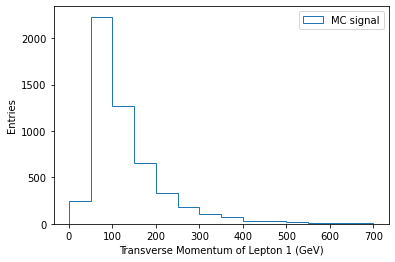

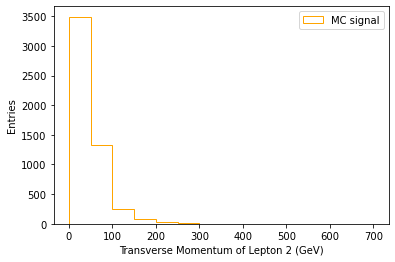

In [70]:
lep1PT = []
lep2PT = []
for i in raw_data_df['lep_pt']:
    lep1PT.append(i[0]*0.001)#decrease by a factor of 10^3 for TeV -> GeV
    lep2PT.append(i[1]*0.001)

#print(max(lep2PT))
#print(np.linspace(0,700,15))

#fig, axs = plt.subplots(1,2, tight_layout = True)
#fig.suptitle('Transverse Lepton Momentum')
#axs[0].hist(lep1PT, bins=np.linspace(0,700,15), histtype='step', label='MC signal')
#axs[1].hist(lep2PT, bins=np.linspace(0,700,15), histtype='step', color='orange', label='MC signal')
#axs[0].set(xlabel='\n Transverse Momentum of Leading Lepton (GeV)', ylabel='Entries')
#axs[1].set(xlabel='Transverse Momentum of Secondary(?) Lepton (GeV)', ylabel='Entries')
#axs[0].legend()
#axs[1].legend()
#plt.show()

lep1PT_hist = plt.hist(lep1PT, bins=np.linspace(0,700,15), histtype='step', label='MC signal')
plt.xlabel('Transverse Momentum of Lepton 1 (GeV)')
plt.ylabel('Entries')
plt.legend()
plt.show()
lep2PT_hist = plt.hist(lep2PT, bins=np.linspace(0,700,15), histtype='step', color='orange', label='MC signal')
plt.xlabel('Transverse Momentum of Lepton 2 (GeV)')
plt.ylabel('Entries')
plt.legend()
plt.show()


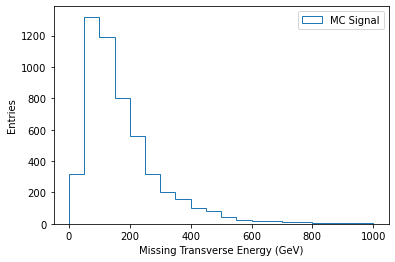

In [73]:
lepMET_hist = plt.hist(raw_data_df['met_et']*0.001, bins=np.linspace(0,1000,21), histtype='step', label='MC Signal')
plt.xlabel('Missing Transverse Energy (GeV)')
plt.ylabel('Entries')
plt.legend()
plt.show()


## Making Cuts on the dataset

First check the amount of data we have

In [74]:
uproot3.numentries(data_path, "mini") #check the number of rows of data

5206

Now let's recap what's in the dataframe

In [75]:
raw_data_df

,runNumber,eventNumber,channelNumber,mcWeight,lep_n,lep_truthMatched,lep_trigMatched,lep_pt,lep_eta,lep_phi,...,lep_type,lep_isTightID,lep_ptcone30,lep_etcone20,lep_trackd0pvunbiased,lep_tracksigd0pvunbiased,met_et,lep_pt_syst,XSection,SumWeights
0,284500,46,306109,1.0,2,"[True, False]","[True, False]","[100990.07, 7426.121]","[-0.7682709, 0.72368354]","[-1.0182151, -2.1507058]",...,"[11, 11]","[True, True]","[0.0, 0.0]","[1215.9817, -544.9584]","[-0.0099716205, 0.009749278]","[1.1405811, 0.6889102]",348277.750000,"[668.81635, 66.78632]",0.005016,10000.0
1,284500,205,306109,1.0,2,"[True, True]","[True, True]","[93777.734, 31697.932]","[-0.5999321, -0.89178747]","[0.17214498, -1.7731516]",...,"[13, 13]","[True, True]","[0.0, 0.0]","[1523.3855, 1132.3503]","[-0.0024083678, -0.0005763579]","[0.32693756, 0.06280022]",104342.265625,"[2037.9049, 107.43644]",0.005016,10000.0
2,284500,235,306109,1.0,2,"[True, True]","[True, True]","[84696.75, 68743.09]","[1.1828485, 1.098033]","[0.37650913, -0.83802056]",...,"[11, 11]","[True, True]","[0.0, 0.0]","[3794.2654, -442.27618]","[0.008800238, 0.0039059948]","[1.0115662, 0.46925277]",128276.781250,"[428.07352, 308.5227]",0.005016,10000.0
3,284500,482,306109,1.0,2,"[True, True]","[True, False]","[95645.26, 22749.984]","[0.03707598, -0.2220163]","[-0.08936702, 2.6688776]",...,"[11, 11]","[True, True]","[0.0, 0.0]","[1735.391, -518.5956]","[-0.013859223, 0.019677153]","[1.790706, 1.7911686]",63393.468750,"[1129.4507, 80.28829]",0.005016,10000.0
4,284500,630,306109,1.0,2,"[True, True]","[True, False]","[128806.86, 15045.653]","[-0.34280708, -0.80403394]","[-2.7522888, -0.12069551]",...,"[11, 11]","[True, True]","[0.0, 0.0]","[-272.75995, -339.5269]","[-0.020453207, 0.01955478]","[3.6392374, 1.2386608]",123417.039062,"[497.85922, 170.0829]",0.005016,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5201,284500,9440,306109,1.0,2,"[True, True]","[True, True]","[72181.87, 51158.71]","[0.5563412, -0.18103471]","[3.0907967, 1.6497777]",...,"[13, 13]","[True, True]","[0.0, 0.0]","[-761.564, -761.564]","[0.011878228, -0.0021623962]","[1.959224, 0.33713147]",106641.679688,"[706.1843, 566.79584]",0.005016,10000.0
5202,284500,9558,306109,1.0,2,"[True, True]","[True, False]","[306378.8, 21968.338]","[0.6307145, 0.52217853]","[-2.6945016, -1.5103921]",...,"[13, 13]","[True, True]","[0.0, 0.0]","[814.3611, -943.9758]","[-0.006906736, 0.007331518]","[1.3408303, 0.7073485]",347592.312500,"[37542.293, 155.38966]",0.005016,10000.0
5203,284500,9697,306109,1.0,2,"[True, True]","[True, True]","[70584.914, 54114.15]","[-1.3256004, -1.0071476]","[-1.9375601, 3.0470493]",...,"[13, 13]","[True, True]","[0.0, 0.0]","[-389.3839, -726.9248]","[0.011187258, -0.024736652]","[1.4650736, 2.6470094]",110196.546875,"[683.6778, 116.885124]",0.005016,10000.0
5204,284500,9922,306109,1.0,2,"[True, True]","[True, True]","[102851.836, 31841.15]","[1.6040598, 1.010763]","[0.39593637, 2.0243583]",...,"[11, 11]","[True, True]","[1450.1215, 0.0]","[1760.7639, -980.12756]","[0.014684265, 0.0007587629]","[1.0974138, 0.045595814]",97570.312500,"[1874.4982, 65.11265]",0.005016,10000.0


In [85]:
#select events with two or more leptons

#loop over each value in desired column
#grab indexes of values with desred feature in a list
#loop over whole dataframe
#remake each column using entries in the indexes list

set(raw_data_df['lep_n'])

#desired_indexes = []
#for i in range(len(raw_data_df['lep_n'])):
#    if raw_data_df.loc[i]['lep_n']>=2:
#        desired_indexes.append(i)

{2}

In [79]:
#select events with invariant mass of both leptons of 

5206

In [82]:
len(desired_indexes)

5206